<a href="https://colab.research.google.com/github/RostislavB74/NN_HW8/blob/main/GoIT_HW_8_new_240224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Створення нейронної мережі

У цьому завданні ми створимо повнозв'язну нейронну мережу, використовуючи при цьому низькорівневі механізми tensorflow.

Архітектура нейромережі представлена на наступному малюнку. Як бачиш, у ній є один вхідний шар, два приховані, а також вихідний шар. В якості активаційної функції у прихованих шарах буде використовуватись сигмоїда. На вихідному шарі ми використовуємо softmax.

Частина коду зі створення мережі вже написана, тобі потрібно заповнити пропуски у вказаних місцях.

## Архітектура нейронної мережі

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## Про датасет MNIST

Дану нейромережу ми будемо вивчати на датасеті MNIST. Цей датасет являє собою велику кількість зображень рукописних цифр розміром $28 \times 28$ пікселів. Кожен піксель приймає значення від 0 до 255.

Як і раніше, датасет буде розділений на навчальну та тестову вибірки. При цьому ми виконаємо нормалізацію всіх зображень, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.

Окрім того, архітектура нейронної мережі очікує на вхід вектор. У нашому ж випадку кожен об'єкт вибірки являє собою матрицю. Що ж робити? У цьому завданні ми "розтягнемо" матрицю $28 \times 28$, отримавши при цьому вектор, що складається з 784 елементів.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Більше інформації про датасет можна знайти [тут](http://yann.lecun.com/exdb/mnist/).

In [1]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [3]:
from keras.datasets import mnist
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


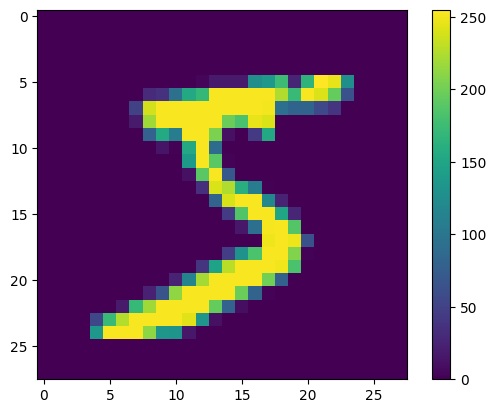

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


# Інший варіант

In [5]:
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

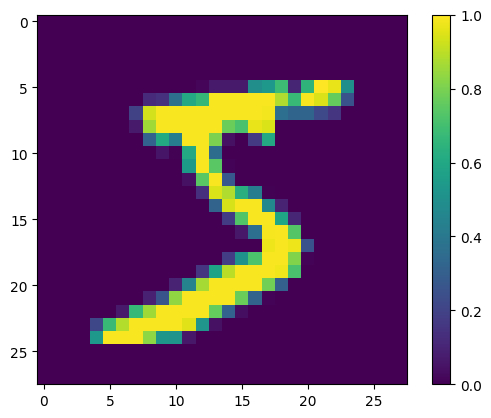

In [7]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

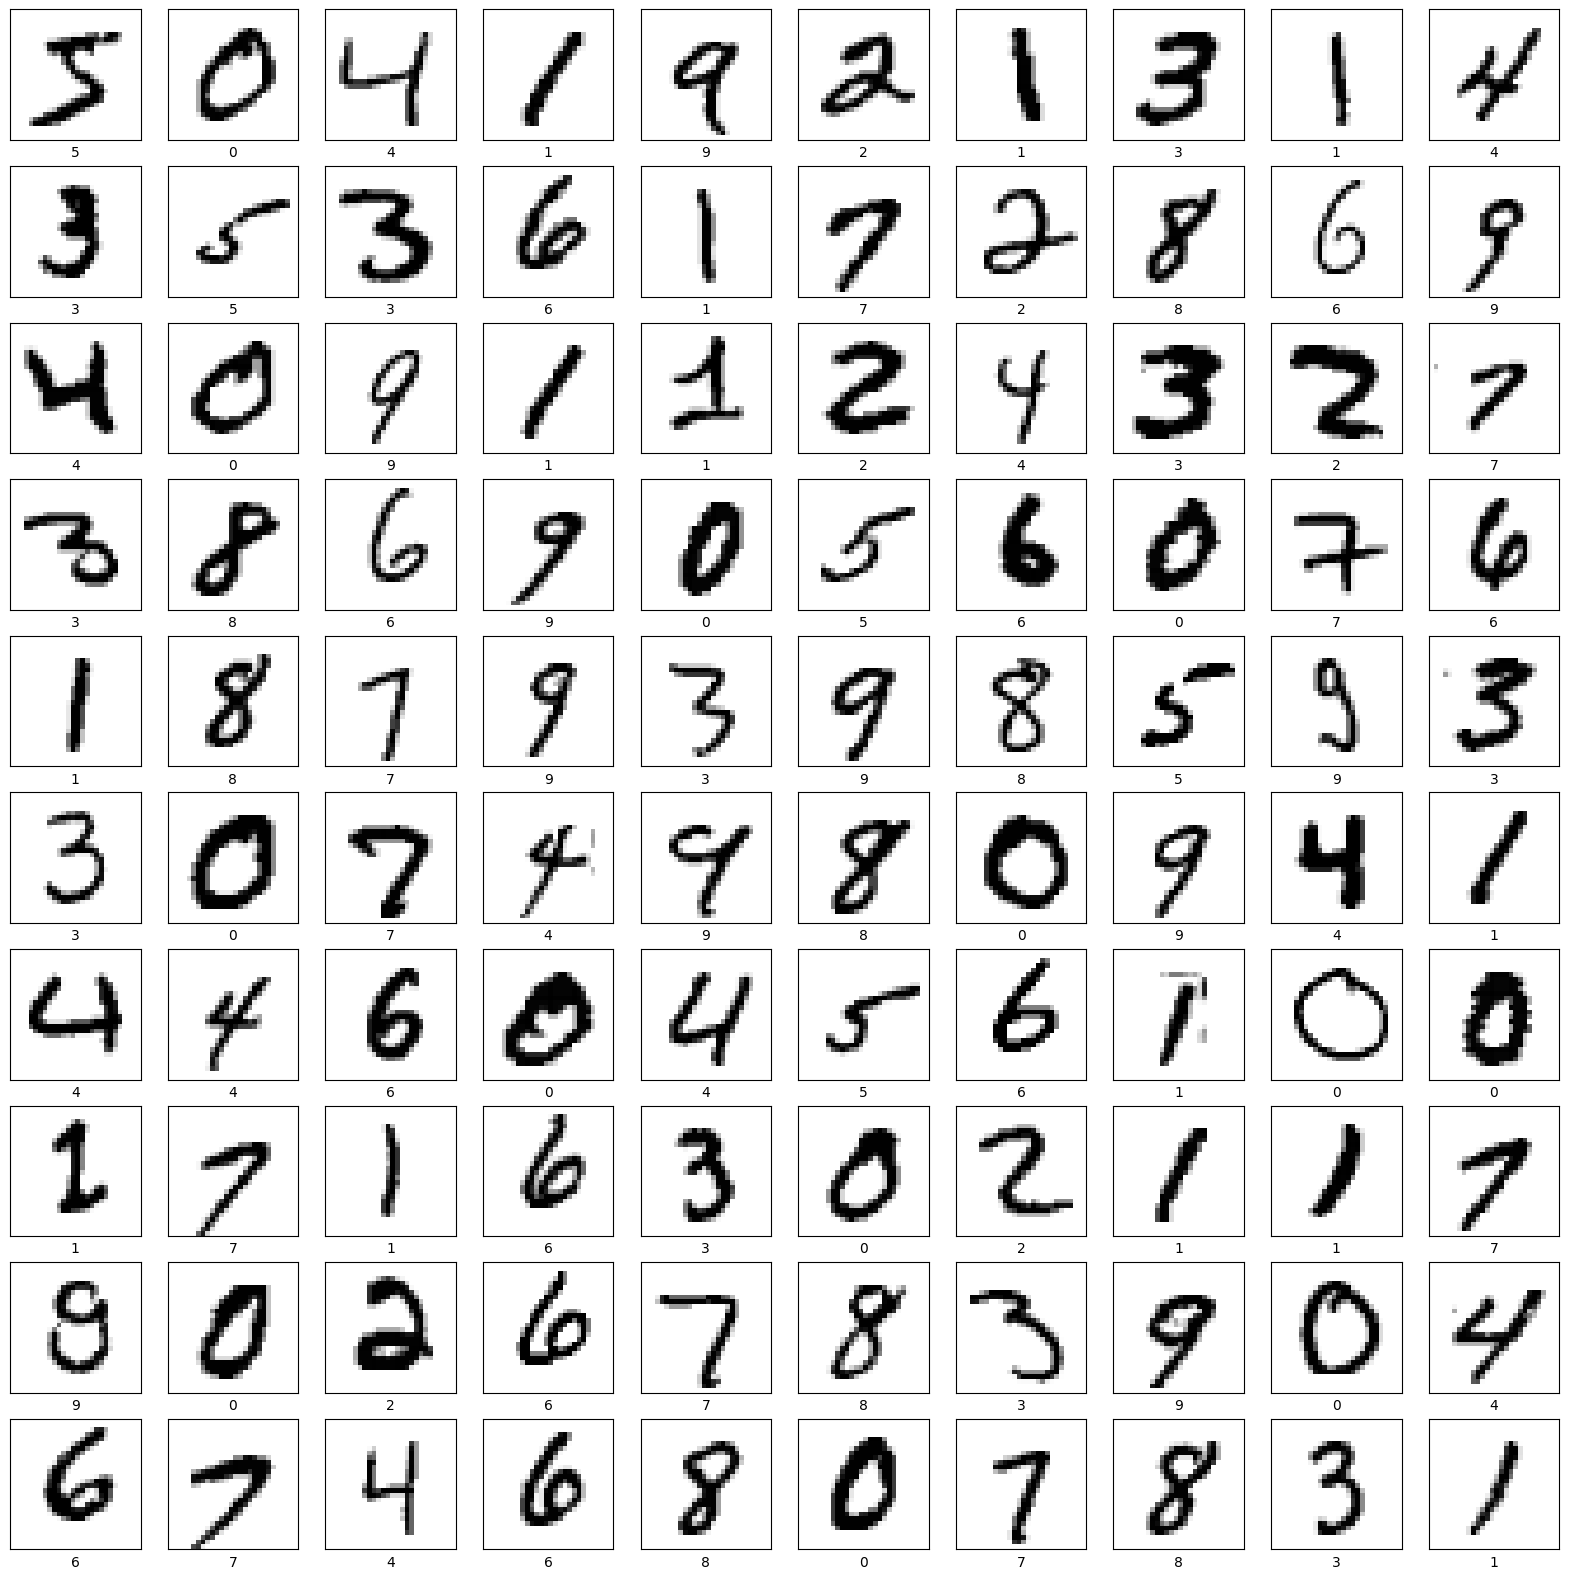

In [8]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7230 - accuracy: 0.8144 - val_loss: 0.3484 - val_accuracy: 0.9024
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3222 - accuracy: 0.9086 - val_loss: 0.2685 - val_accuracy: 0.9221
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2667 - accuracy: 0.9236 - val_loss: 0.2333 - val_accuracy: 0.9334
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2318 - accuracy: 0.9335 - val_loss: 0.2060 - val_accuracy: 0.9417
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2052 - accuracy: 0.9417 - val_loss: 0.1952 - val_accuracy: 0.9442
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1840 - accuracy: 0.9475 - val_loss: 0.1746 - val_accuracy: 0.9509
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1663 - accuracy: 0.9529 - val_loss: 0.1616 - val_accuracy:

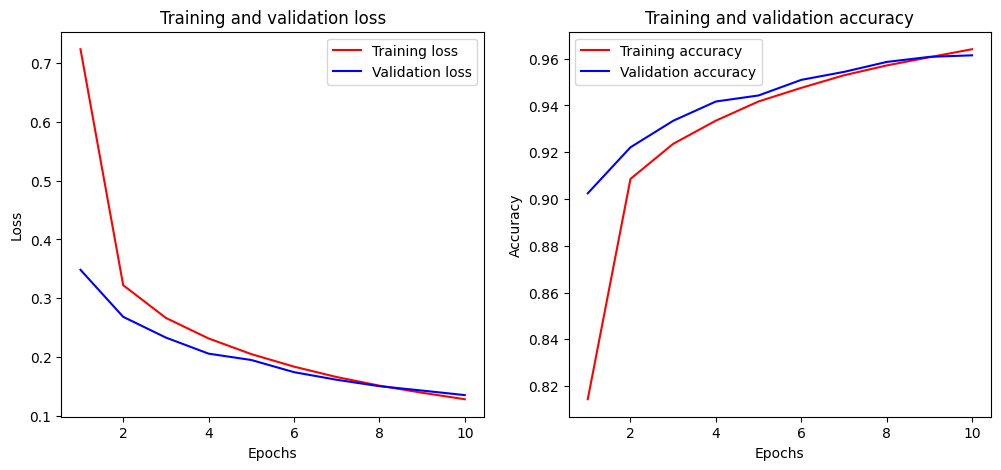

In [12]:
history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=10, validation_split=0.2)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9625
Test accuracy: 0.9624999761581421
Test loss: 0.13377498090267181


1/1 [==============================] - 0s 88ms/step
[[2.2940379e-05 3.2922480e-06 5.2039290e-04 8.7326294e-04 9.8501698e-07
  3.5317211e-05 2.0163625e-08 9.9844056e-01 1.5295263e-05 8.8039902e-05]]
Цифра, що розпізнана: 7


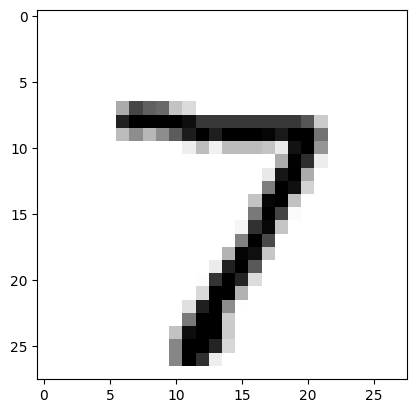

In [14]:
n=0
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Цифра, що розпізнана: {np.argmax(res)}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [15]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 3s 2ms/step


In [16]:
predictions[1]

array([9.9990839e-01, 2.2421820e-07, 5.1878120e-05, 7.5137223e-06,
       1.9001217e-08, 2.4161578e-05, 2.1373689e-06, 3.7547891e-06,
       4.6585180e-07, 1.4422179e-06], dtype=float32)

In [17]:
np.argmax(predictions[1])

0

In [18]:
y_train_1[1]

0

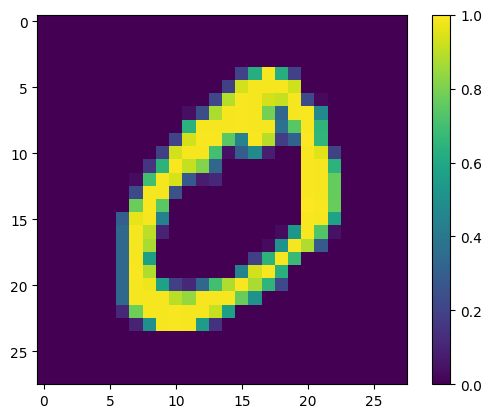

In [20]:
plt.figure()
plt.imshow(x_train_1[1])
plt.colorbar()
plt.grid(False)

In [21]:
class_names[np.argmax(predictions[1])]

'0'

In [22]:
predictions_all=model.predict(x_test_1)
predictions_all=np.argmax(predictions_all,axis=1)
print(predictions_all.shape)
print(predictions_all[:20])
print(y_test_1[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [23]:
mask=predictions_all==y_test_1
print(mask[:10])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(375, 28, 28)


In [24]:
len(x_false)

375

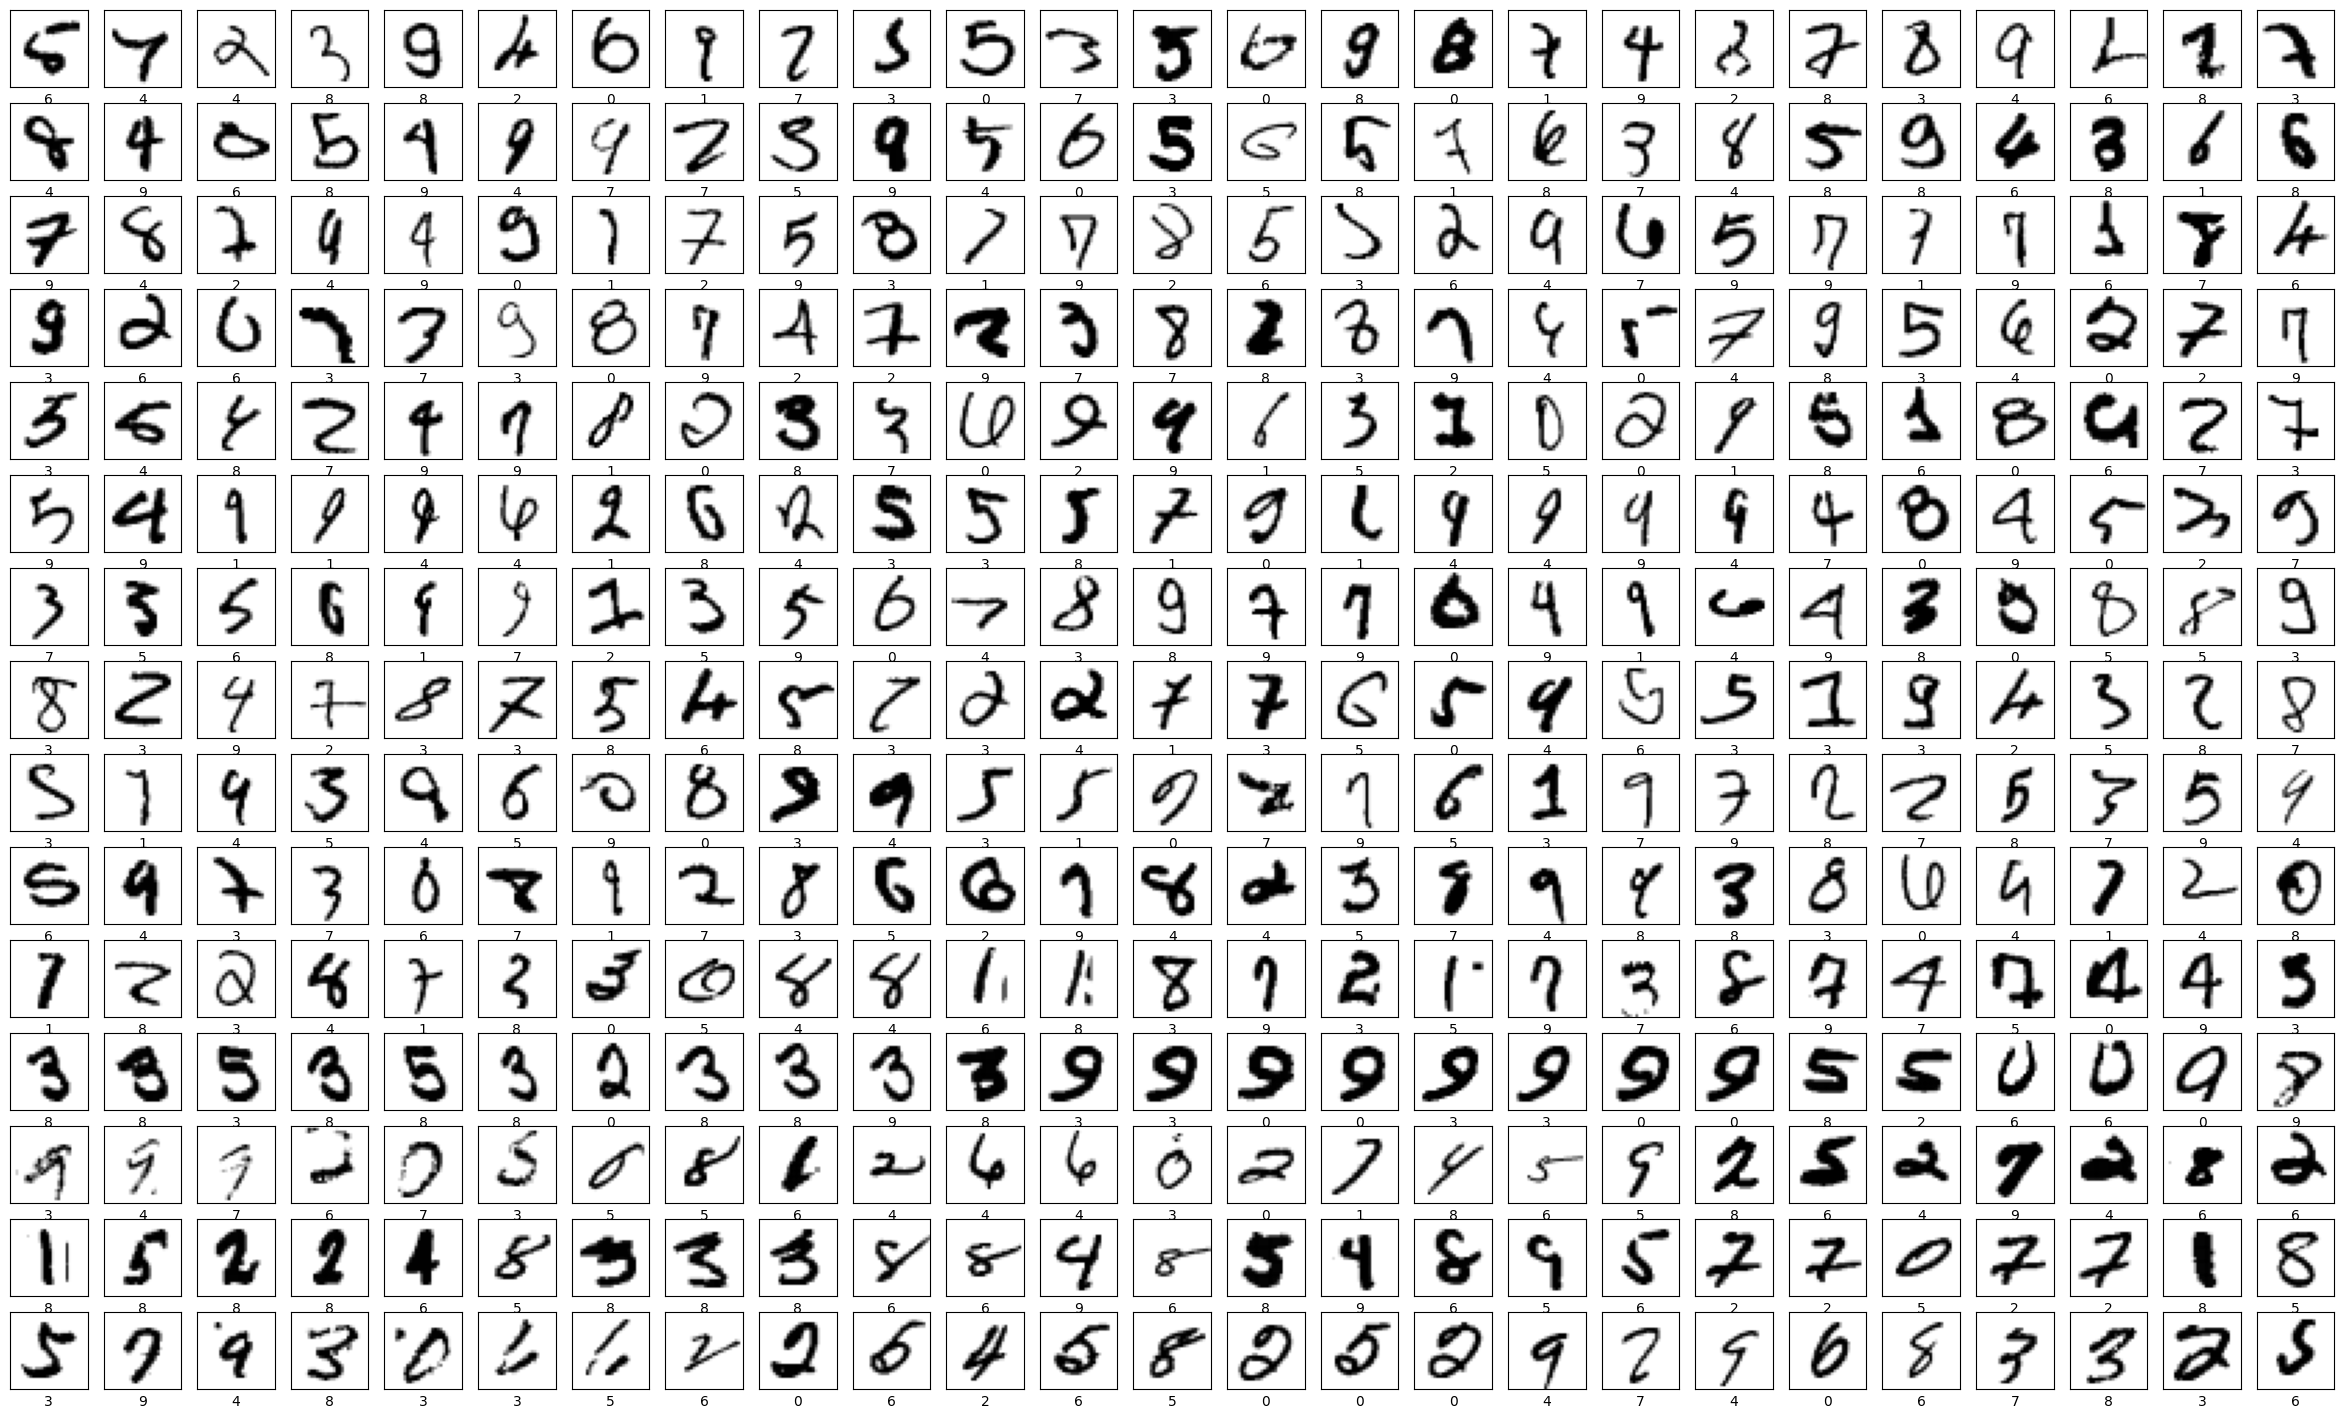

In [30]:
plt.figure(figsize=(30,30))
for i in range(len(x_false)):
  plt.subplot(25,25,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

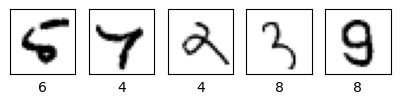

In [31]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [32]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"Цифра {class_names[digit]}: {count} помилкових класифікацій")

Цифра 0: 14 помилкових класифікацій
Цифра 1: 12 помилкових класифікацій
Цифра 2: 46 помилкових класифікацій
Цифра 3: 38 помилкових класифікацій
Цифра 4: 28 помилкових класифікацій
Цифра 5: 53 помилкових класифікацій
Цифра 6: 29 помилкових класифікацій
Цифра 7: 50 помилкових класифікацій
Цифра 8: 44 помилкових класифікацій
Цифра 9: 61 помилкових класифікацій


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 966    0    0    2    0    4    5    1    1    1]
 [   0 1123    2    2    0    1    4    0    3    0]
 [   8    1  986    5    8    0    6    8    9    1]
 [   1    0    1  972    0    7    0   10   18    1]
 [   1    0    4    0  954    0    4    2    2   15]
 [   6    1    1   15    2  839   11    0   12    5]
 [   8    3    1    1    5    6  929    1    4    0]
 [   0   12    9    7    3    1    0  978    0   18]
 [   5    1    2    9    7    6    7    5  930    2]
 [   8    7    1   10   21    2    1    5    6  948]]


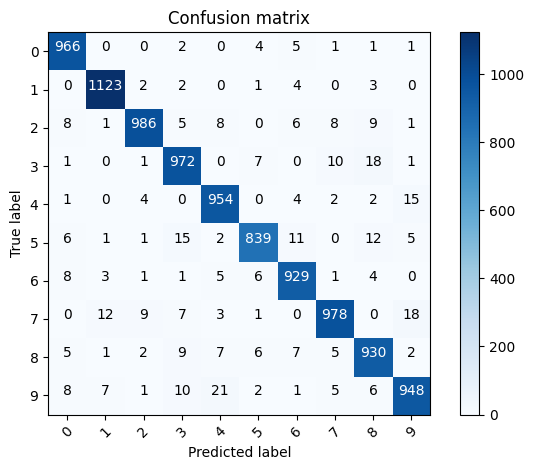

In [34]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

#ДЗ

In [35]:
# # from tensorflow.keras.datasets import mnist
# from keras.datasets import mnist

# # Завантажуємо датасет
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.
y_train, y_test = y_train, y_test
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])


# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [36]:
# Створимо нейронну мережу

class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=0):
        y = tf.matmul(x, self.w) + self.b
        if activation != 0:
            return tf.nn.softmax(y)
        else:
            return tf.nn.sigmoid(y)
class NN(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)
    # Перший шар, який складається з 128 нейронів
    self.layer_1 = DenseLayer(in_features=num_features, out_features=n_hidden_1, name='Inputs')
    # Другий шар, який складається з 256 нейронів
    self.layer_2 = DenseLayer(in_features=n_hidden_1, out_features=n_hidden_2, name='HiddenLayer1')
    # Вихідний шар
    self.layer_3 = DenseLayer(in_features=n_hidden_2, out_features=num_classes, name='Hypothesis')


  def __call__(self, x):
    # Передача даних через перші два шари та вихідний шар з функцією активації softmax
    x = self.layer_1(x)
    x = self.layer_2(x)

    return self.layer_3(x, activation=True)

In [37]:
# В якості функції помилки (loss) в даному випадку зручно взяти крос-ентропію
def cross_entropy(y_pred, y_true):
    # Закодувати label в one hot vector
    y_true = tf.one_hot(y_true, depth=num_classes)

    # Значення передбачення, щоб уникнути помилки log(0).
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Обчислення крос-ентропії
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

#     return accuracy
def accuracy(y_pred, y_true):
    # Convert predicted probabilities to predicted labels
    y_pred_labels = tf.argmax(y_pred, axis=1)

    # Convert predicted labels and true labels to int64
    y_pred_labels = tf.cast(y_pred_labels, tf.int64)
    y_true = tf.cast(y_true, tf.int64)

    # Compare predicted labels with true labels
    correct_predictions = tf.equal(y_pred_labels, y_true)

    # Compute accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

    return accuracy


SGD train

In [38]:
neural_net = NN(name="mnist")
# # Функція навчання нейромережі
def train1(model, input_x, output_y,learning_rate=learning_rate):
    optimizer = tf.optimizers.SGD(learning_rate, momentum=0.0, nesterov=True)
    # optimizer = tf.optimizers.Adam(learning_rate)
    with tf.GradientTape() as tape:
        pred = model(input_x)
        loss = cross_entropy(pred, output_y)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Обчислюємо точність під час тренування
    accuracy_value = accuracy(pred, output_y)

    return loss, accuracy_value

Adam train

In [39]:
neural_net = NN(name="mnist")
# # Функція навчання нейромережі
def train(model, input_x, output_y,learning_rate=learning_rate):
    # optimizer = tf.optimizers.SGD(learning_rate, momentum=0.0, nesterov=True)
    optimizer = tf.optimizers.Adam(learning_rate)
    with tf.GradientTape() as tape:
        pred = model(input_x)
        loss = cross_entropy(pred, output_y)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Обчислюємо точність під час тренування
    accuracy_value = accuracy(pred, output_y)

    return loss, accuracy_value

Тренування

SGD

In [40]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Тренування мережі
loss_history1 = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_history1 = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Оновлюємо ваги нейронної мережі
    # print(batch_x)
    # print(f"{batch_y.dtype=}")
    train1(neural_net, batch_x, batch_y, learning_rate=0.002)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        # print(batch_y.shape)
        # print(pred.shape)
        current_loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        accuracy_history1.append(acc)
        loss_history1.append(current_loss)
        print(f"Step {step:4}, Loss: {current_loss:7.2f}, Accuracy: {acc:.2%}")
        if acc > 0.99:
          print("Break by accuracy")
          break

Step  100, Loss:  223.63, Accuracy: 76.56%
Step  200, Loss:  120.56, Accuracy: 81.64%
Step  300, Loss:  114.79, Accuracy: 89.84%
Step  400, Loss:  117.51, Accuracy: 84.38%
Step  500, Loss:   81.72, Accuracy: 92.19%
Step  600, Loss:   85.11, Accuracy: 89.84%
Step  700, Loss:   71.56, Accuracy: 91.02%
Step  800, Loss:   57.91, Accuracy: 92.58%
Step  900, Loss:   77.74, Accuracy: 89.84%
Step 1000, Loss:   79.38, Accuracy: 91.80%
Step 1100, Loss:   73.96, Accuracy: 91.80%
Step 1200, Loss:   52.37, Accuracy: 93.75%
Step 1300, Loss:   65.41, Accuracy: 91.41%
Step 1400, Loss:   46.10, Accuracy: 93.36%
Step 1500, Loss:   44.33, Accuracy: 95.70%
Step 1600, Loss:   51.51, Accuracy: 95.31%
Step 1700, Loss:   51.38, Accuracy: 94.53%
Step 1800, Loss:   47.23, Accuracy: 93.75%
Step 1900, Loss:   47.64, Accuracy: 95.31%
Step 2000, Loss:   40.36, Accuracy: 96.09%
Step 2100, Loss:   25.66, Accuracy: 97.27%
Step 2200, Loss:   43.14, Accuracy: 95.31%
Step 2300, Loss:   33.54, Accuracy: 96.88%
Step 2400, 

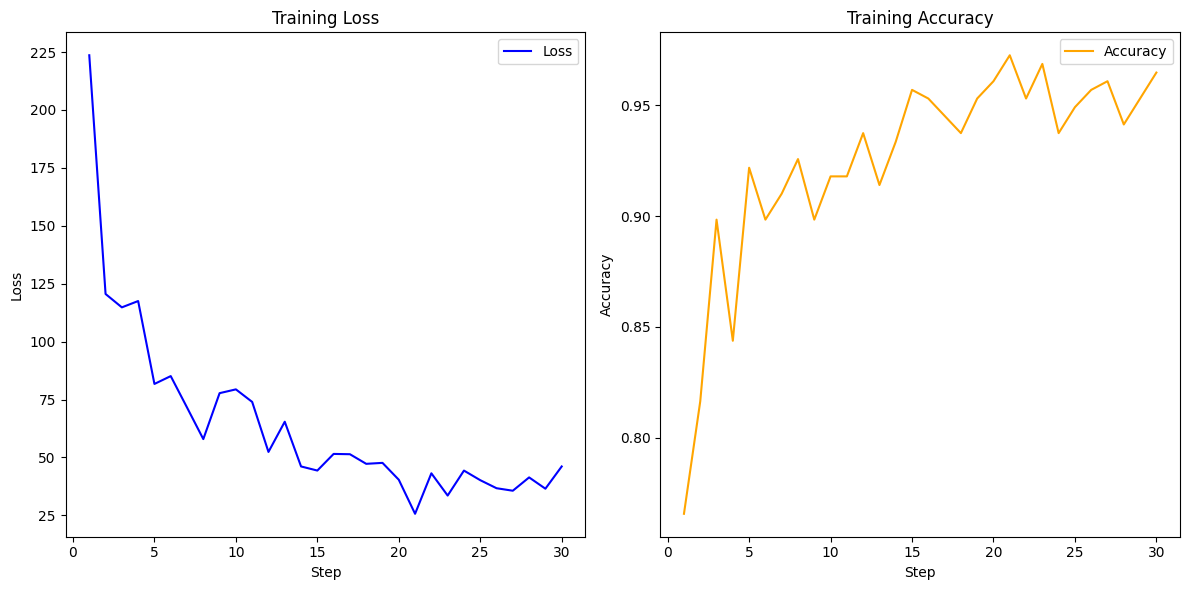

In [41]:
# Виведення графіків
plt.figure(figsize=(12, 6))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history1) + 1), loss_history1, label='Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history1) + 1), accuracy_history1, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Adam

In [42]:
# Створимо екземпляр нейронної мережі
neural_net = NN(name="mnist")

# Тренування мережі
loss_history = []  # кожні display_step кроків зберігай в цьому списку поточну помилку нейромережі
accuracy_history = [] # кожні display_step кроків зберігай в цьому списку поточну точність нейромережі

# У цьому циклі ми будемо проводити навчання нейронної мережі
# із тренувального датасета train_data вилучи випадкову підмножину, на якій
# відбудеться тренування. Використовуй метод take, доступний для тренувального датасета.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Оновлюємо ваги нейронної мережі
    # print(batch_x)
    # print(f"{batch_y.dtype=}")
    train(neural_net, batch_x, batch_y, learning_rate=0.002)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        # print(batch_y.shape)
        # print(pred.shape)
        current_loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        accuracy_history.append(acc)
        loss_history.append(current_loss)
        print(f"Step {step:4}, Loss: {current_loss:7.2f}, Accuracy: {acc:.2%}")
        if acc > 0.99:
          print("Break by accuracy")
          break

Step  100, Loss:  251.23, Accuracy: 75.39%
Step  200, Loss:  165.80, Accuracy: 82.42%
Step  300, Loss:  136.87, Accuracy: 84.77%
Step  400, Loss:   51.30, Accuracy: 94.14%
Step  500, Loss:   59.52, Accuracy: 93.75%
Step  600, Loss:   90.06, Accuracy: 91.80%
Step  700, Loss:   66.43, Accuracy: 94.14%
Step  800, Loss:   45.54, Accuracy: 94.14%
Step  900, Loss:   32.79, Accuracy: 96.09%
Step 1000, Loss:   43.76, Accuracy: 95.31%
Step 1100, Loss:   48.07, Accuracy: 94.14%
Step 1200, Loss:   32.21, Accuracy: 98.05%
Step 1300, Loss:   26.66, Accuracy: 96.48%
Step 1400, Loss:   13.91, Accuracy: 98.44%
Step 1500, Loss:   29.66, Accuracy: 97.66%
Step 1600, Loss:   18.35, Accuracy: 97.66%
Step 1700, Loss:   45.65, Accuracy: 95.70%
Step 1800, Loss:   24.11, Accuracy: 98.05%
Step 1900, Loss:   28.26, Accuracy: 96.88%
Step 2000, Loss:    8.10, Accuracy: 99.61%
Break by accuracy


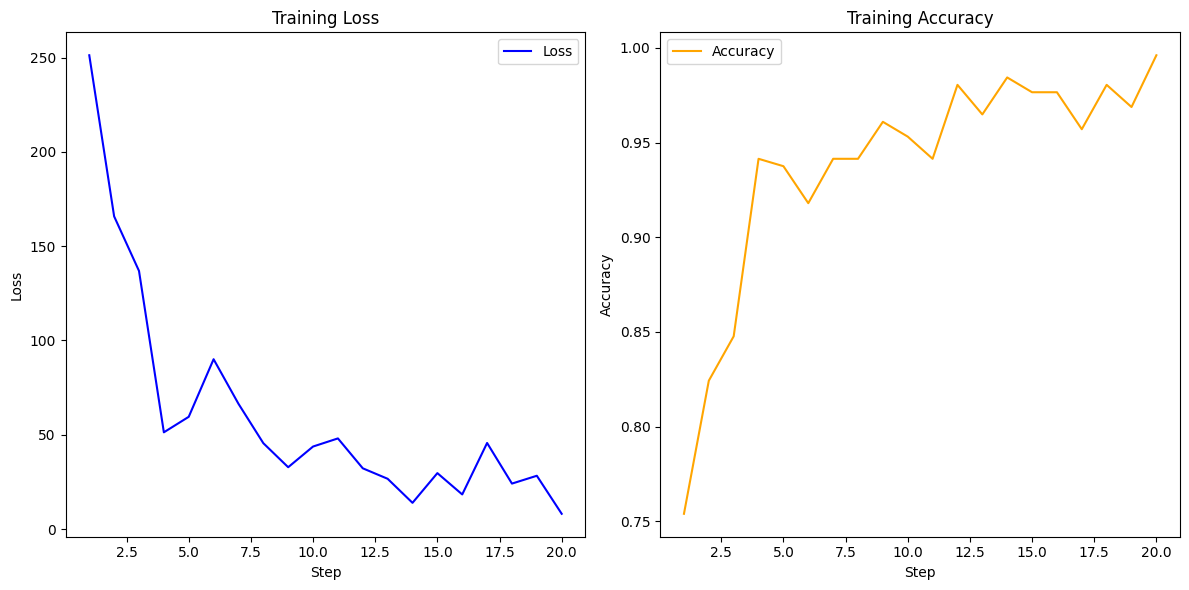

In [43]:
# Виведення графіків
plt.figure(figsize=(12, 6))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history) + 1), loss_history, label='Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Навчання

In [44]:
# Обчисліть точність навченої нейромережі
acc_mean = np.mean(accuracy_history)
print(f"{acc_mean=:%}")
# Тестування моделі на тестових даних
test_pred = neural_net(x_test)
test_acc = accuracy(test_pred, y_test).numpy()
test_pred_values = np.argmax(test_pred, axis=1)
print(f"{test_acc=:%}")

acc_mean=93.730468%
test_acc=94.120002%


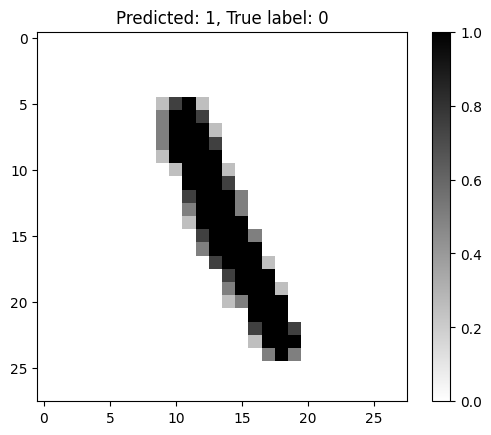

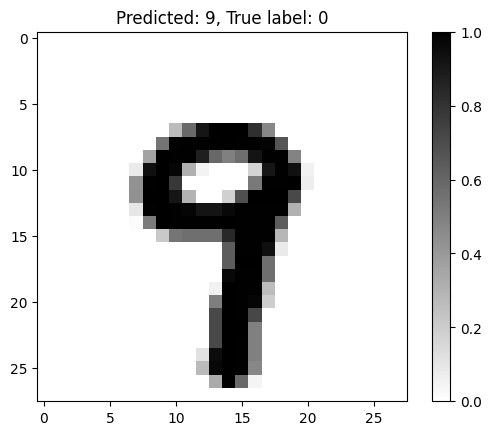

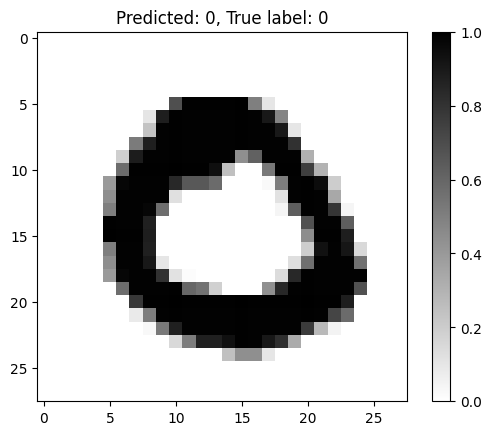

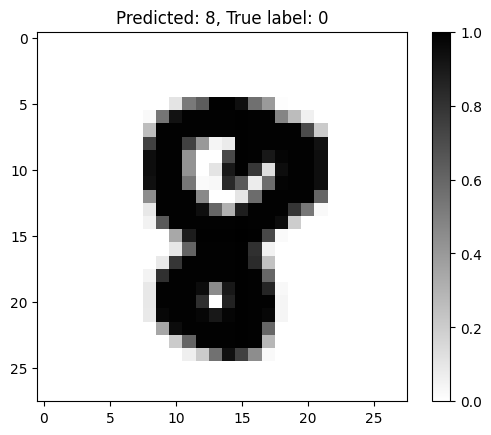

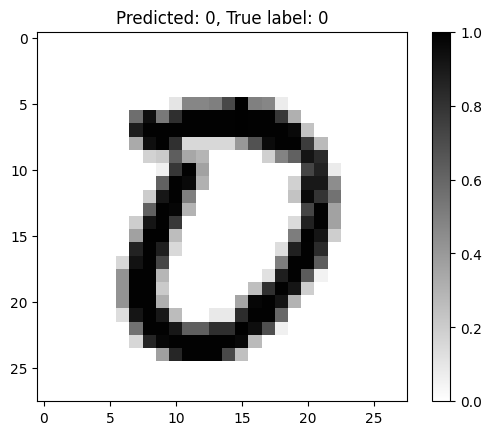

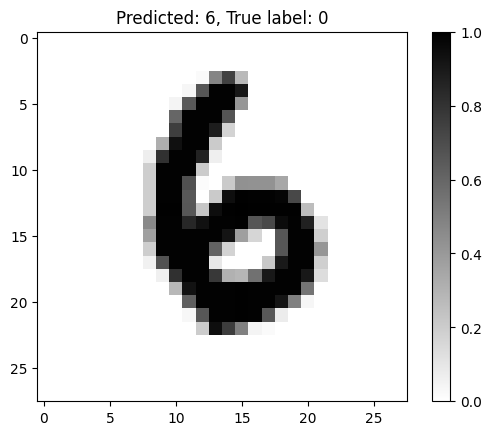

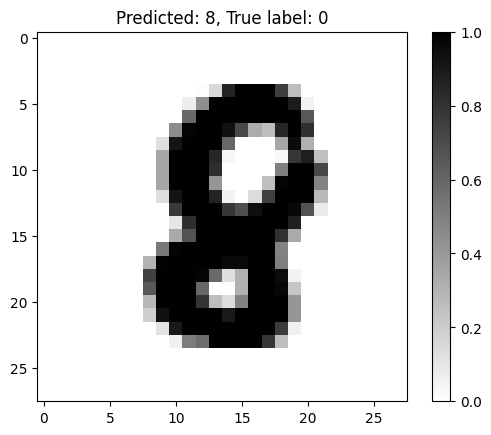

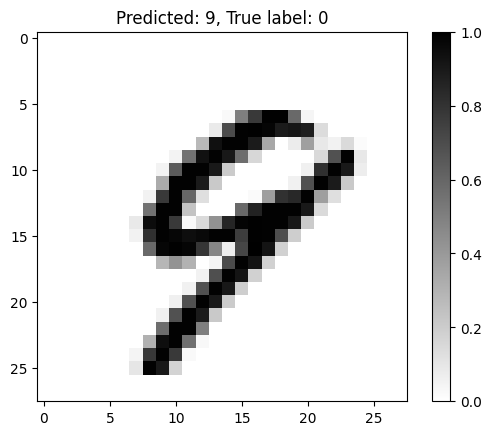

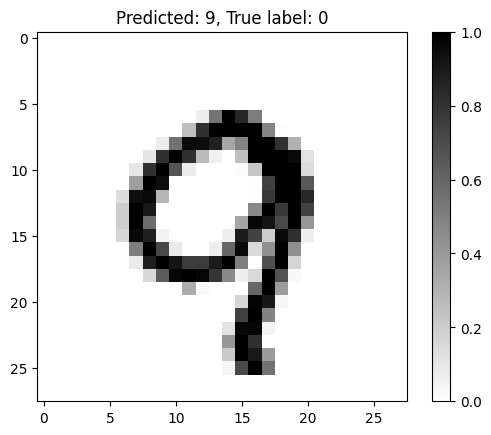

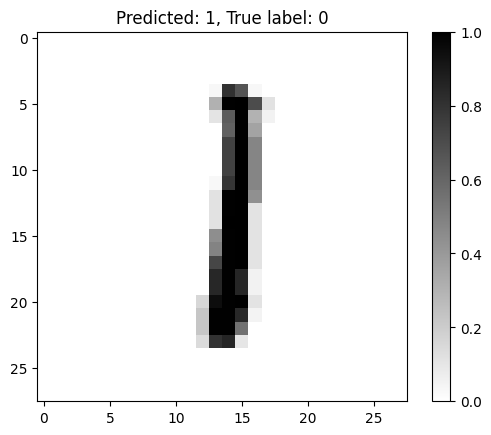

In [45]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

# Функція для відображення зображення та його передбачення
def display_image_prediction(image, prediction, true_label):
    image = np.reshape(image, (28, 28))
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"Predicted: {prediction}, True label: {true_label}")
    plt.colorbar()
    plt.grid(False)
    plt.show()


indices = np.random.choice(x_test.shape[0], size=10, replace=False)
test_images = x_test[indices]
true_labels = y_test[indices]


predictions = neural_net(test_images)

# Порівняємо прогнози з справжніми мітками та виведемо результати
for i in range(10):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(true_labels[i])
    display_image_prediction(test_images[i], predicted_label, true_label)



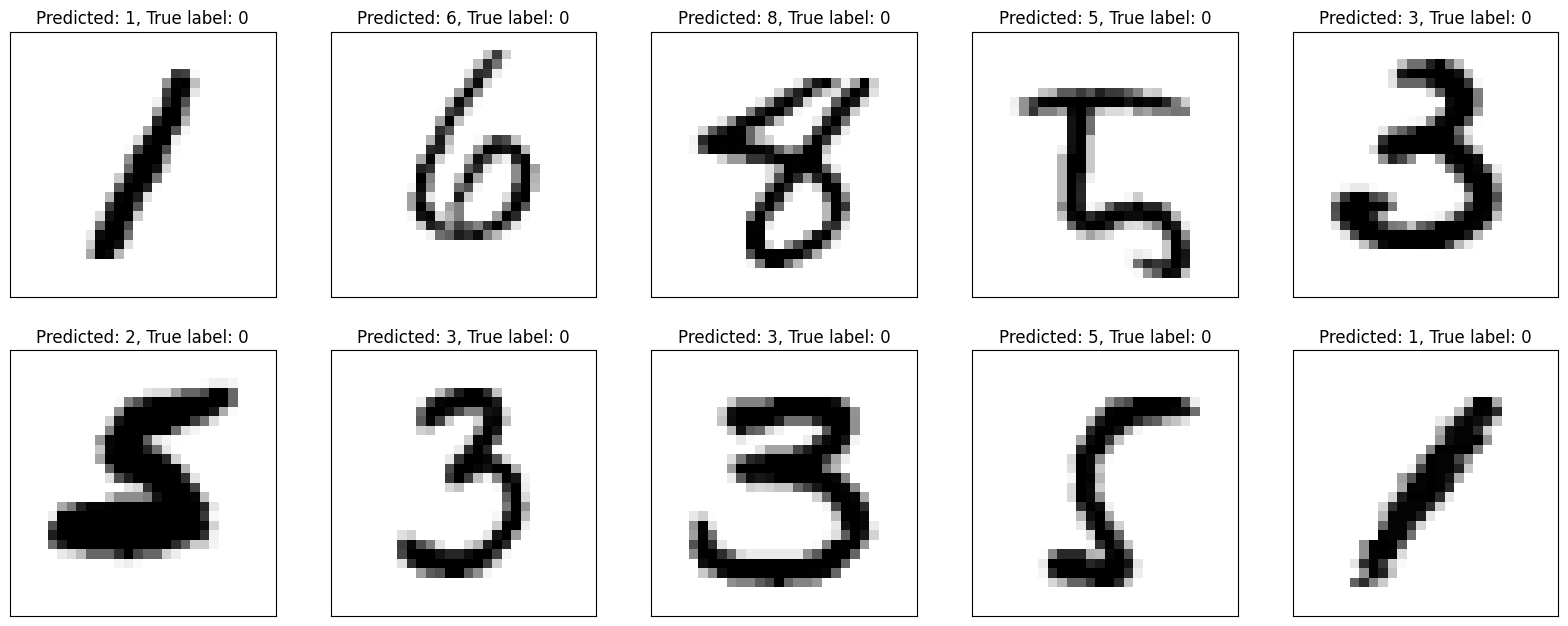

In [46]:
import matplotlib.pyplot as plt

# Функція для відображення зображень та їх передбачення
def display_image_predictions(images, predictions, true_labels):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        # Змінюємо форму зображень перед відображенням
        image = images[i].reshape(28, 28)
        plt.imshow(image, cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        plt.title(f"Predicted: {predicted_label}, True label: {true_label}")
    plt.show()

# Випадковим чином виберемо 10 зображень з тестової вибірки
indices = np.random.choice(x_test.shape[0], size=10, replace=False)
test_images = x_test[indices]
true_labels = y_test[indices]

# Отримаємо прогнози навченої нейромережі
predictions = neural_net(test_images)

# Відображення зображень та їх передбачення
display_image_predictions(test_images, predictions, true_labels)


In [47]:
# Перетворення міток y_test з one-hot encoding на одномірний масив
y_test_labels = np.argmax(y_test, axis=None)

# Знайдення помилкових цифр
misclassified_indices = np.where(np.argmax(predictions, axis=1) != y_test_labels)[0]

# Підрахунок кількості помилкових зображень
num_misclassified = len(misclassified_indices)
print(f"Кількість помилкових зображень: {num_misclassified}")


Кількість помилкових зображень: 10


In [48]:
target_names = [ f"Number: {i}" for i in range(0, num_classes)]
print(classification_report(y_test, test_pred_values, target_names=target_names))
cr = classification_report(y_test, test_pred_values, target_names=target_names, output_dict=True)
print(cr["accuracy"])

              precision    recall  f1-score   support

   Number: 0       0.95      0.98      0.96       980
   Number: 1       0.98      0.98      0.98      1135
   Number: 2       0.93      0.94      0.93      1032
   Number: 3       0.94      0.92      0.93      1010
   Number: 4       0.96      0.92      0.94       982
   Number: 5       0.92      0.92      0.92       892
   Number: 6       0.95      0.95      0.95       958
   Number: 7       0.94      0.94      0.94      1028
   Number: 8       0.90      0.93      0.91       974
   Number: 9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

0.9412


In [49]:
# Протестуйте навчену нейромережу на 10 зображеннях. З тестової вибірки візьміть 5
# випадкових зображень і передайте їх у нейронну мережу.
# Виведіть зображення та випишіть  поруч відповідь нейромережі.
# Зробіть висновок про те, чи помиляється твоя нейронна мережа, і якщо так, то як часто?

predictions_all=model.predict(x_test)
predictions_all=np.argmax(predictions_all,axis=1)
print(predictions_all.shape)
print(predictions_all[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Матриця плутанини

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 966    0    0    2    0    4    5    1    1    1]
 [   0 1123    2    2    0    1    4    0    3    0]
 [   8    1  986    5    8    0    6    8    9    1]
 [   1    0    1  972    0    7    0   10   18    1]
 [   1    0    4    0  954    0    4    2    2   15]
 [   6    1    1   15    2  839   11    0   12    5]
 [   8    3    1    1    5    6  929    1    4    0]
 [   0   12    9    7    3    1    0  978    0   18]
 [   5    1    2    9    7    6    7    5  930    2]
 [   8    7    1   10   21    2    1    5    6  948]]


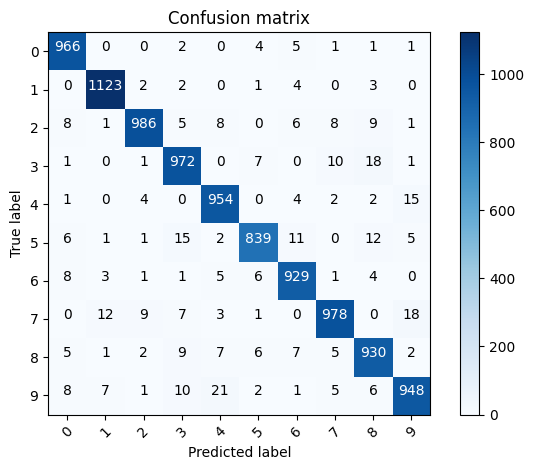

In [50]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=range(10))